In [ ]:
from tool.functions import *
from tool.eval2 import *

In [ ]:
def get_weight():
    weights = {}
    with open('./files/stats.csv', 'r', encoding = 'utf-8') as inp:
        for line in inp:
            data = line.split()
            weights[data[0]+'-'+data[1]] = 1/log10(10 + float(data[2]) + 0.5 * float(data[3]))
            weights[data[1]+'-'+data[0]] = 1/log10(10 + float(data[2]) + 0.5 * float(data[4]))
    with open('./files/weights','w',encoding='utf-8') as outp:
        json.dump(weights, outp)

In [ ]:
def weighted_path_length(path):
    global weights
    length = 0
    for key, value in enumerate(path[1:]):
        length += weights[path[key].lang+'-'+value.lang]
    #print (length)
    return exp(-length)

In [ ]:
def metric(G, word, translation, cutoff, mode='exp'):
    coef = 0
    if mode in ('exp', 'len'):
        t = Counter([len(i) for i in nx.all_simple_paths(G, word, translation, cutoff=cutoff)])
        if mode == 'exp': 
            for i in t: 
                coef += exp(-i)*t[i]
            return coef
        if mode == 'len':
            for i in t: 
                coef += t[i]*i
            return coef
    if mode in ('exp-len'):
        for path in nx.all_simple_paths(G, word, translation, cutoff=5):
            coef += weighted_path_length(path)

In [ ]:
get_weight()

In [ ]:
%timeit with open ('./files/weights','r') as inp: weights = json.load(inp)

In [ ]:
with open ('./files/weights','r') as inp: weights = json.load(inp)

In [ ]:
list(weights.items())[-10:]

In [ ]:
lang1, lang2, n = 'eng','spa', 10
%time get_relevant_languages(lang1, lang2)
%time load_file(lang1, lang2, n=n)
%time change_encoding('{}-{}'.format(lang1,lang2))
%time G = built_from_file('{}-{}'.format(lang1,lang2))
%time l1, l2 = dictionaries(lang1, lang2)

In [ ]:
%time print_lemma_results(lemma_search (G, 'star', l1, 'spa', 4, 40, metric='exp-len'), n = 5)

In [ ]:
lang1, lang2, n = 'eng','spa', 10

In [ ]:
%time eval_loop(lang1, lang2, n=10, cutoff=4, n_iter=3, topn=5, metric='exp-len')

In [ ]:
lang1, lang2, n = 'eng','spa', 10
%time eval_loop(lang1, lang2, n=10, cutoff=4, n_iter=3, topn=5)#, metric='exp-len')

In [ ]:
lang1, lang2, n = 'rus','ukr', 10
%time eval_loop(lang1, lang2, n=10, cutoff=4, n_iter=3, topn=5)# metric='exp-len')

In [ ]:
lang1, lang2, n = 'rus','pol', 10
%time eval_loop(lang1, lang2, n=10, cutoff=4, n_iter=3, topn=5)# metric='exp-len')

In [27]:
%time s = get_evaluation_pairs(G, l1, lang2, n=1000)

Wall time: 937 ms


In [28]:
u, v = s[0][0], s[0][1]
u,v

(eng$Domeciano$[np-ant_np_np-ant-m-sg], spa$Domeciano$[np-ant])

In [30]:
H = nx.DiGraph()
for path in nx.all_simple_paths(G, u, v, cutoff=5):
    H.add_path(path)

eng$manufacturer$[n_n-sg] spa$fabricante$[n-mf_n_n-mf-sg]


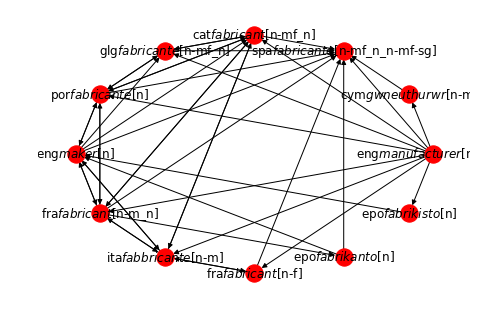

In [19]:
print (u, v)
nx.draw_shell(H, with_labels = True)

eng$radiotherapy$[n] spa$radioterapia$[n_n-f]


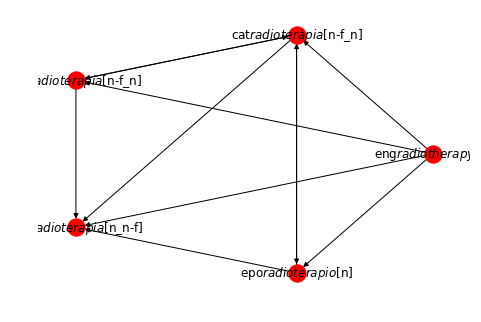

In [26]:
print (u, v)
nx.draw_shell(H, with_labels = True)

eng$Domeciano$[np-ant_np_np-ant-m-sg] spa$Domeciano$[np-ant]


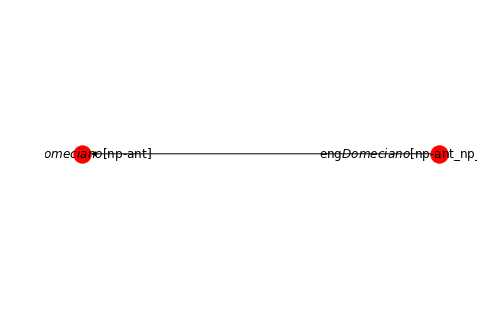

In [31]:
print (u, v)
nx.draw_shell(H, with_labels = True)

In [ ]:
coef = 0
for path in nx.all_simple_paths(G, u, v, cutoff=5):
    coef += weighted_path_length(path)

In [ ]:
coef

In [ ]:
def foo():
    global a
    a = 1

In [ ]:
a = 5

In [ ]:
def foo():
    global a
    a = 6

In [ ]:
foo()
a